In [3]:
library(Seurat)
library(Matrix)
library(future)
library(dplyr)
library(data.table)
library(ggplot2)
library(pheatmap)
library(reshape2)
library(patchwork)
library(ggforce)
library(akima)
library(ggrepel)
library(harmony)

Loading required package: Rcpp



In [4]:
gill_sc <- readRDS("/home/yating/VLR/a_gill.rds")
blood_sc <- readRDS("/home/yating/VLR/a_blood.rds")
intestine_sc <- readRDS("/home/yating/VLR/7.22/a_intestine.rds")

In [7]:
VLR_markers <- c(
     "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG",
    "MSTRG.4638" = "VLRB")

In [8]:
immune_markers <- c(
     "MSTRG.13589" = "GATA2",
    "MSTRG.9831" = "MIF",
    "nbisL1-mrna-15855" = "SYK",
    "MSTRG.16992" = "IL-8",
    "MSTRG.22347" = "IL-17",
    "nbisL1-mrna-8897" = "TLR3",
    "MSTRG.26784" = "CDA")

In [9]:
markers <- c( "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG",
    "MSTRG.4638" = "VLRB",
    "MSTRG.13589" = "GATA2",
    "MSTRG.9831" = "MIF",
    "nbisL1-mrna-15855" = "SYK",
    "MSTRG.16992" = "IL-8",
    "MSTRG.22347" = "IL-17",
    "nbisL1-mrna-8897" = "TLR3",
    "MSTRG.26784" = "CDA")

In [10]:
cluster_markers <- c(
    "MSTRG.964" = "CYGB",
    "MSTRG.963" = "glob1",
    "MSTRG.5275" = "AGR3",
    "MSTRG.3738" = "S100A4",
    "nbisL1-mrna-14501" = "MPC1",
    "nbisL1-mrna-13609" = "IDH3G",
    "MSTRG.25883" = "HAAF",
    "MSTRG.24553" = "LIP",
    "MSTRG.16655" = "IL6R",
    "nbisL1-mrna-4346" = "C1QTNF9",
    "MSTRG.22455" = "FN1",
    "MSTRG.2805" = "BGN",
    "nbisL1-mrna-16670" = "ENKUR",
    "nbisL1-mrna-747" = "RSPH9",
    "MSTRG.11339" = "TOP2A",
    "nbisL1-mrna-11418" = "RRM2",
    "nbisL1-mrna-6434" = "PBK",
     "nbisL1-mrna-8501" = "KIT",
    "nbisL1-mrna-10278" = "SIGLEC1",
    "MSTRG.4638" = "VLRB",
     "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG")

In [11]:
cluster_markers_blood <- c(
    "MSTRG.3386" = "GRN",
    "nbisL1-mrna-4804" = "CXCR4",
    "MSTRG.25883" = "HAAF",
    "nbisL1-mrna-4499" = "MMP19",
    "MSTRG.22455" = "FN1",
    "MSTRG.6734" = "ITGB3",
    "MSTRG.5103" = "LRP1",
    "nbisL1-mrna-5941" = "PMP22",
    "nbisL1-mrna-6434" = "PBK",
    "nbisL1-mrna-6531" = "DCTD",
    "MSTRG.8828" = "TLR7",
    "nbisL1-mrna-12477" = "IL12B",
    "MSTRG.18522" = "CNBP",
    "MSTRG.9684" = "RAN",
    "MSTRG.11339" = "TOP2A",
    "MSTRG.8958" = "FABP7",
    "MSTRG.961" = "glob1",
    "nbisL1-mrna-403" = "CYGB",
    "MSTRG.4638" = "VLRB",
    "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG")

In [12]:
cluster_markers_intestine <- c(
    "MSTRG.6602" = "ADIPOQ",
    "MSTRG.3293" = "ADAM12",
    "MSTRG.2637" = "RIBC2",
    "MSTRG.11055" = "CDHR3",
    "MSTRG.8400" = "METRN",
    "MSTRG.17336" = "RXRG",
    "MSTRG.5396" = "GLUC1",
    "MSTRG.13764" = "PTPRG",
    "MSTRG.3740" = "S100P",
    "MSTRG.5275" = "AGR3",
    "MSTRG.8562" = "SDC2",
    "MSTRG.5248" = "RECK",
    "nbisL1-mrna-4499" = "MMP19",
    "MSTRG.25883" = "HAAF",
    "MSTRG.8350" = "INS",
    "nbisL1-mrna-6218" = "CPE",
    "MSTRG.8193" = "BMP4",
    "nbisL1-mrna-5525" = "AKAP12",
    "nbisL1-mrna-16446" = "TFPI2",
    "nbisL1-mrna-14979" = "FNDC1",
    "MSTRG.13223" = "IFITM3",
    "MSTRG.18385"= "BHLHE41",
    "MSTRG.5627" = "CDK2",
    "nbisL1-mrna-1642" = "CTSC",
    "nbisL1-mrna-895" = "IFI30",
    "MSTRG.15998" = "GLB2",
    "nbisL1-mrna-17144" = "MEIS2",
    "MSTRG.6798" = "IL8",
    "MSTRG.21086" = "IL1B",
    "MSTRG.990" = "GLOB1",
    "nbisL1-mrna-403" = "CYGB",
    "MSTRG.4638" = "VLRB",
    "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG")

In [13]:
cluster_markers_harmony <- c(
  # Mon
  "MSTRG.22455" = "FN1",
  "MSTRG.6734" = "ITGB3",
  # 血
  "MSTRG.19418" = "BLVRB",
  "nbisL1-mrna-403" = "CYGB",
  # Gran
  "nbisL1-mrna-4499" = "MMP19",
  "nbisL1-mrna-6971" = "MMP25",
  # Epi
  "MSTRG.5275" = "AGR3",
  "MSTRG.1219" = "EPCAM",
  # Pericyte
  "nbisL1-mrna-17144" = "MEIS2",
  # pDC
  "MSTRG.16655" = "IL6R",
  #"MSTRG.5769" = "MYL6",
  # Mese
  "MSTRG.8193" = "BMP4",
  # Acinar
  "MSTRG.12489" = "CTRB1",
  "MSTRG.25222" = "CEL",
  # Enter
  "MSTRG.5396" = "GLUC1",
  "MSTRG.26612" = "GLUC",
  "MSTRG.13764" = "PTPRG",
  # Proliferatin
  "MSTRG.11339" = "TOP2A",
  "nbisL1-mrna-11418" = "RRM2",
  "MSTRG.4638" = "VLRB",
  "nbisL1-mrna-8677" = "VLRC",
    "nbisL1-mrna-15664" = "VLRA",
     "MSTRG.31304" = "VLRD",
    "MSTRG.31308" = "VLRE",
    "nbisL1-mrna-15650" = "VLRF",
    "MSTRG.4829" = "VLRG"
)

# Gill_old

In [14]:
gill_sc@meta.data$newcell <- as.character(gill_sc@meta.data$newcell)
gill_sc@meta.data$newcell[gill_sc@meta.data$newcell == "VLRC cell"] <- "T-like cells"
gill_sc@meta.data$newcell[gill_sc@meta.data$newcell == "VLRB cell"] <- "B-like cells"
gill_sc@meta.data$newcell[gill_sc@meta.data$newcell == "Endothelial cell"] <- "Epithelial cell"

In [15]:
unique(gill_sc@meta.data$newcell)

[1] "Ionocyte"                        "Red blood cells"                
 [3] "dendritic cell"                  "Epithelial cell"                
 [5] "Proliferating cell"              "Granulocyte"                    
 [7] "T-like cells"                    "Fibroblasts"                    
 [9] "B-like cells"                    "Ciliated airway epithelial cell"
[11] "immune cell"

In [11]:
gill_colors <- c(
  "Ciliated airway epithelial cell" = "#E64B35",   # 红橙
  "dendritic cell" = "#D39BCB",                    # 浅紫
  "Epithelial cell" = "#F38160" ,                   # 柔肤粉
  "Fibroblasts" = "#00A087",                      # 青绿色
  "Granulocyte" = "#4DBBD5",                      # 蓝绿
  "immune cell" = "#3C5488",                      # 深蓝灰
  "Ionocyte" = "#7E6148",                         # 棕褐
  "Proliferating cell" = "#A6A6A6",               # 灰
 "Red blood cells" = "#FAA39E",                  # 鲜红
  "T-like cells" = "#B24745",                # 🔺**亮红棕（较原先更亮）**
  "B-like cells" = "#3E7CB1"                         # 🔵**明亮蓝紫（更显眼）**
)

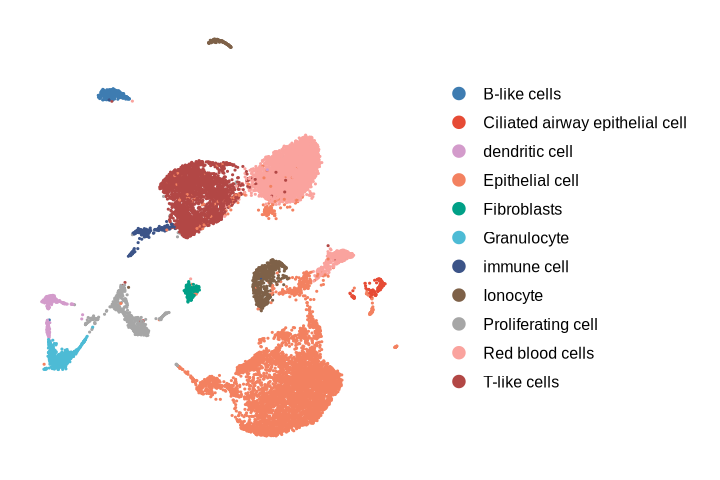

In [9]:
DimPlot(gill_sc, group.by = "newcell") +
  scale_color_manual(values = gill_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )
options(repr.plot.width = 6, repr.plot.height = 4)

In [86]:
# 赋值图像对象
p1_gill <- DimPlot(gill_sc, group.by = "newcell") +
  scale_color_manual(values = gill_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_blank()
  )

# 保存为 PNG 图像（你可以改路径和大小）
ggsave(
  filename = "/home/yating/VLR/gill_umap_nocircle.png",  # 改成你希望的路径和文件名
  plot = p1_gill,
  width = 6, height = 4, dpi = 300
)

In [14]:
umap_df <- as.data.frame(gill_sc@reductions$umap@cell.embeddings)
umap_df$group <- gill_sc$newcell

In [20]:
p_gill <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = group), size = 0.5, alpha = 0.6) +
  geom_mark_hull(
    data = df_core_all,
    aes(group = group),
    color = "black",
    fill = NA,
    linetype = "solid",
    linewidth = 0.8,
    concavity = 2, expand = unit(2, "mm")
  ) +
  geom_text_repel(
    data = label_positions,
    aes(x = UMAP_1, y = UMAP_2, label = group),
    size = 5, fontface = "bold", color = "black",
    nudge_x = label_positions$nudge_x,
    nudge_y = label_positions$nudge_y,
    box.padding = 0.8, max.overlaps = Inf
  ) +
  scale_color_manual(values = gill_colors) +
  guides(color = guide_legend(override.aes = list(size = 3))) +
  theme_void(base_size = 12) +
  theme(
    legend.position = "right",
    legend.title = element_blank()
  )

# 保存为高分辨率 PNG
ggsave("/home/yating/VLR/gill_TB_UMAP_plot.png", plot = p_gill, width = 6, height = 4, dpi = 300)

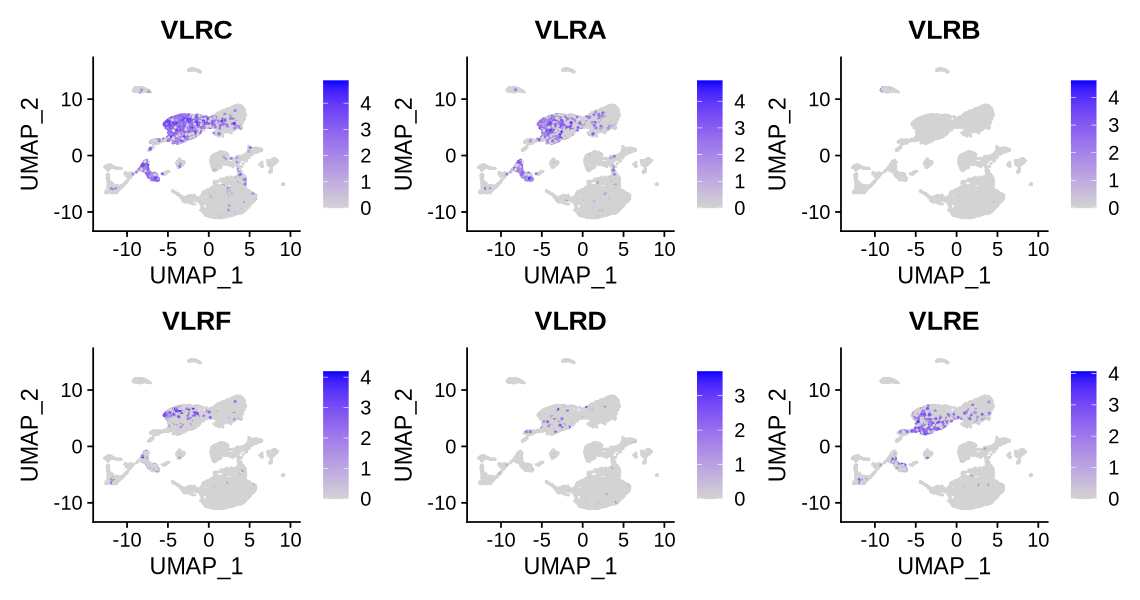

In [28]:
plots <- lapply(names(VLR_markers), function(gene) {
  FeaturePlot(gill_sc, features = gene) +
    ggtitle(VLR_markers[gene]) +
    theme(plot.title = element_text(hjust = 0.5))
})

wrap_plots(plots, ncol = 3)
options(repr.plot.width = 9.5, repr.plot.height = 5)

In [72]:
p_gill_vlra <- FeaturePlot(gill_sc, features = c("nbisL1-mrna-15664")) +
  labs(title = "VLRA") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/gill_VLRA_featureplot.png", plot = p_gill_vlra, width = 4, height = 3.5, dpi = 300)

# VLRC
p_gill_vlrc <- FeaturePlot(gill_sc, features = c("nbisL1-mrna-8677")) +
  labs(title = "VLRC") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/gill_VLRC_featureplot.png", plot = p_gill_vlrc, width = 4, height = 3.5, dpi = 300)

# VLRB
p_gill_vlrb <- FeaturePlot(gill_sc, features = c("MSTRG.4638")) +
  labs(title = "VLRB") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/gill_VLRB_featureplot.png", plot = p_gill_vlrb, width = 4, height = 3.5, dpi = 300)

# VLRD
p_gill_vlrd <- FeaturePlot(gill_sc, features = c("MSTRG.31304")) +
  labs(title = "VLRD") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/gill_VLRD_featureplot.png", plot = p_gill_vlrd, width = 4, height = 3.5, dpi = 300)

# VLRE
p_gill_vlre <- FeaturePlot(gill_sc, features = c("MSTRG.31308")) +
  labs(title = "VLRE") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/gill_VLRE_featureplot.png", plot = p_gill_vlre, width = 4, height = 3.5, dpi = 300)

In [62]:
# VLRG
p_gill_vlrg <- FeaturePlot(gill_sc, features = c("MSTRG.4829")) +
  labs(title = "VLRG") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/gill_VLRG_featureplot.png", plot = p_gill_vlrg, width = 4, height = 3.5, dpi = 300)

# VLRF
p_gill_vlrf <- FeaturePlot(gill_sc, features = c("nbisL1-mrna-15650")) +
  labs(title = "VLRF") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/gill_VLRF_featureplot.png", plot = p_gill_vlrf, width = 4, height = 3.5, dpi = 300)

cluster_markers

In [14]:
Idents(gill_sc) <- "newcell"

In [15]:
gill.exp <- AverageExpression(gill_sc, return.seurat = FALSE)$RNA

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.


In [16]:
# 选择感兴趣的基因
genes <- names(cluster_markers)
gill_sub_exp <- gill.exp[genes, , drop = FALSE]

In [17]:
gill_scaled_exp <- t(scale(t(gill_sub_exp)))

In [18]:
rownames(gill_scaled_exp) <- cluster_markers[rownames(gill_scaled_exp)]

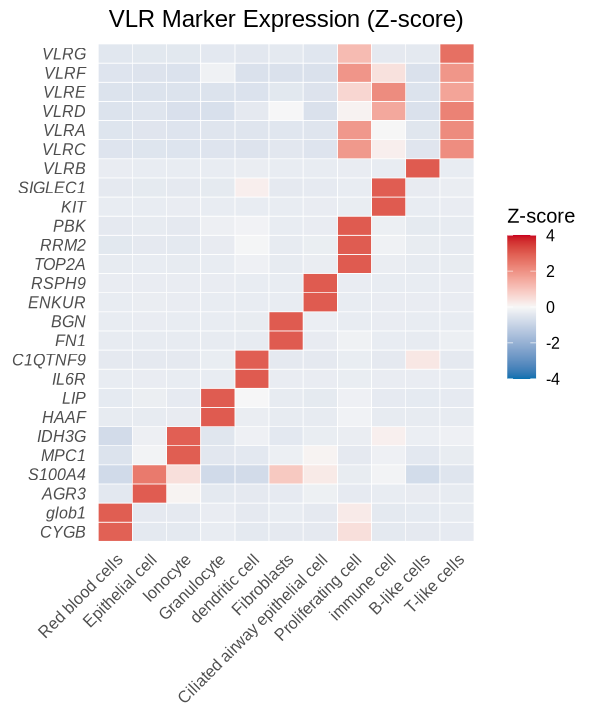

In [20]:
# 将 matrix 转换成 long dataframe
gill_scaled_df <- as.data.frame(gill_scaled_exp)
gill_scaled_df$Gene <- rownames(gill_scaled_df)
df_long_gill <- melt(gill_scaled_df, id.vars = "Gene", variable.name = "Celltype", value.name = "Zscore")

# 你希望的 celltype 顺序（把 VLRC 和 VLRB 放最后）
desired_order <- c(
  "Red blood cells", "Epithelial cell", "Ionocyte", 
  "Granulocyte", "dendritic cell", 
  "Fibroblasts", "Ciliated airway epithelial cell","Proliferating cell","immune cell",
  "B-like cells","T-like cells" )
gene_order <- unname(cluster_markers)  # 提取 value（即 CYGB, VLRC, etc.）保持顺序

# 转换为有序因子
df_long_gill$Celltype <- factor(df_long_gill$Celltype, levels = desired_order)
df_long_gill$Gene <- factor(df_long_gill$Gene, levels = gene_order)


# 设置颜色映射，与原图相似
my_colors <- scale_fill_gradient2(
  low = "#0571b0",   # 深蓝，对应 Z=-3
  mid = "#f7f7f7",   # 白色，对应 Z=0
  high = "#ca0020",  # 深红，对应 Z=+3
  midpoint = 0,
  limits = c(-4, 4), # 保持对称的视觉效果
  name = "Z-score"
)

# 绘图
ggplot(df_long_gill, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    plot.title = element_text(hjust = 0.5)
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)
options(repr.plot.width = 5, repr.plot.height = 6)

In [21]:
p_gillheatmap <- ggplot(df_long_gill, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    plot.title = element_text(hjust = 0.5)
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

ggsave("/home/yating/VLR/VLR_new/gill_marker_heatmap_TB.png", plot = p_gillheatmap, width = 5, height = 6, dpi = 300)

# Merge

In [17]:
gill_sc$batch <- "gill"
blood_sc$batch <- "blood"
intestine_sc$batch <- "intestine"

In [18]:
merge_sc <- merge(gill_sc, y = list(blood_sc, intestine_sc), add.cell.ids = c("gill", "blood", "intestine"))

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


ERROR: Error in rbind(new_residual, old_residuals): number of columns of matrices must match (see arg 2)


In [18]:
DefaultAssay(merge_sc) <- "RNA"

In [15]:
merge_sc$batch <- dplyr::case_when(
  grepl("^Gill", merge_sc$orig.ident, ignore.case = TRUE) ~ "gill",
  grepl("^blood", merge_sc$orig.ident, ignore.case = TRUE) ~ "blood",
  grepl("^intestine", merge_sc$orig.ident, ignore.case = TRUE) ~ "intestine",
  TRUE ~ NA_character_
)

In [17]:
merge_sc[["RNA"]] <- split(merge_sc[["RNA"]], f = merge_sc$batch)

Warning message:
“Input is a v3 assay and `split()` only works for v5 assays; converting
• to a v5 assay”
Warning message:
“Assay RNA changing from Assay to Assay5”


In [19]:
merge_sc <- merge_sc %>% NormalizeData(verbose = F) %>% 
    FindVariableFeatures(verbose = F) %>% 
    ScaleData(verbose = F) %>% 
    RunPCA(npcs = 30, verbose = FALSE)

In [25]:
my_batch_colors <- c(
  "blood"     = "#E64B35",  # 柔和红
  "gill"      = "#00A087",  # 青绿色
  "intestine" = "#3C5488"   # 深蓝灰
)

harmony_other

In [16]:
merge_sc.harmony <- IntegrateLayers(object = merge_sc, method = HarmonyIntegration,
                         orig.reduction = "pca", new.reduction = "harmony",
                         normalization.method = "RNA", verbose = FALSE) %>% 
    RunUMAP(reduction = "harmony", dims = 1:30,seed.use = 42,
            verbose = FALSE,reduction.name = "umap.harmony") %>% 
    RunTSNE(reduction = "harmony", dims = 1:30, verbose = FALSE,seed.use = 42) 

ERROR: Error: object 'merge_sc' not found


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



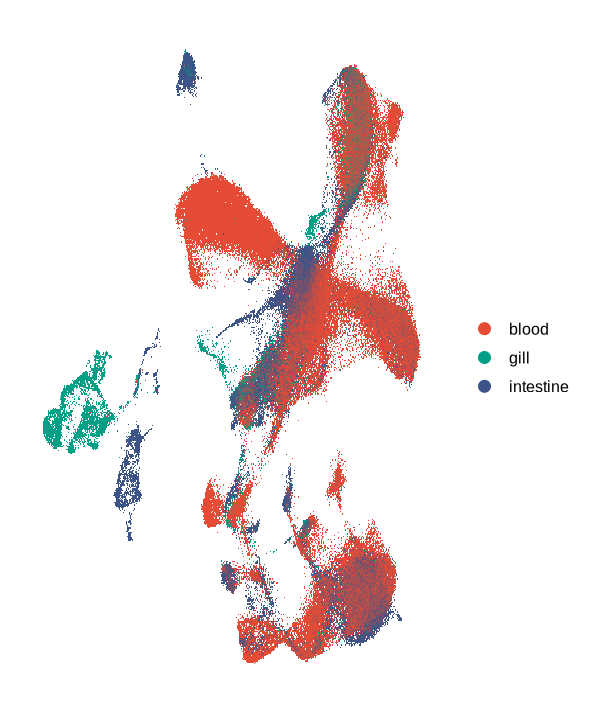

In [30]:
DimPlot(merge_sc_harmony, reduction = "umap.harmony", group.by = "batch") +
  scale_color_manual(values = c(
    "blood"     = "#E64B35",
    "gill"      = "#00A087",
    "intestine" = "#3C5488"
  )) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),       # ✅ 去除方格线
    axis.title.x = element_blank(),     # 可选：去除坐标轴标题
    axis.title.y = element_blank(),
    axis.text = element_blank(),        # 可选：去除刻度数字
    axis.ticks = element_blank(),       # 可选：去除刻度线
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_blank()
  )
options(repr.plot.width = 5, repr.plot.height = 4)

In [32]:
merge_sc_harmony[['RNA']] <- JoinLayers(merge_sc_harmony[["RNA"]])

In [33]:
DefaultAssay(merge_sc_harmony) <- "RNA"
Idents(merge_sc_harmony) <- "RNA_snn_res.0.2"

In [34]:
new.cluster.ids <- c(
  "0" = "T-like cells",
  "1" = "Monocyte",
  "2" = "Red blood cells",
  "3" = "Granulocyte",
  "4" = "B-like cells",
  "5" = "Granulocyte",
  "6" = "Epithelial cell",
  "7" = "Pericyte",
  "8" = "Proliferating cell",
  "9" = "B-like cells",
  "10" = "T-like cells",
  "11" = "pDC",
  "12" = "Mesenchymal cell",
  "13" = "B-like cells",
  "14" = "T-like cells",
  "15" = "Red blood cells",
  "16" = "Red blood cells",
  "17" = "Acinar cell",
  "18" = "Enteroendocrine cell"
)

merge_sc_harmony <- RenameIdents(merge_sc_harmony, new.cluster.ids)

merge_sc_harmony[["celltype_harmony"]] <- Idents(merge_sc_harmony)

In [35]:
harmony_colors <- c(
  "Granulocyte"                       = "#4DBBD5",   # 浅蓝青（保留）
  "Red blood cells"                   = "#FAA39E",   # 鲜红（保留）
  "B-like cells"                         = "#3E7CB1",   # 深蓝紫（保留）
  "Epithelial cell"                  = "#F38160",   # 橙黄色
  "T-like cells"                = "#B24745",   # 深砖红（保留）
  "Pericyte"                          = "#8DD3C7",   # 浅青绿
  "Mesenchymal cell"                  = "#B3DE69",   # 青绿色偏黄
  "pDC"                               = "#A6CEE3",   # 浅蓝
  "Monocyte"                          = "#3C5488",   # 深蓝灰（保留）
  "Acinar cell"                       = "#FF7F00",   # 橙色
  "Enteroendocrine cell"             = "#6A3D9A",    # 深紫
  "Proliferating cell"               = "#A6A6A6"
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



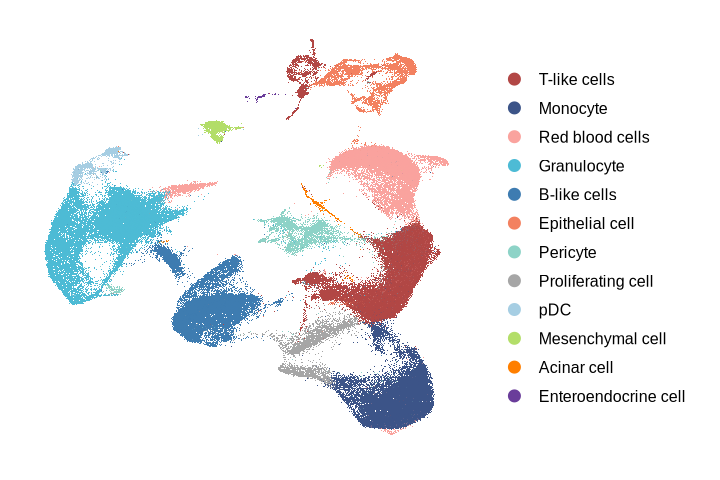

In [76]:
DimPlot(merge_sc_harmony, group.by = "celltype_harmony") +
  scale_color_manual(values = harmony_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )
options(repr.plot.width = 6, repr.plot.height = 4)

In [77]:
p_mergeharmony <- DimPlot(merge_sc_harmony, group.by = "celltype_harmony") +
  scale_color_manual(values = harmony_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_blank()
  )
ggsave("/home/yating/VLR/harmony_dimplot_TB.png", plot = p_mergeharmony, width = 6, height = 4, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [78]:
p_batch <- DimPlot(merge_sc_harmony, reduction = "umap.harmony", group.by = "batch") +
  scale_color_manual(values = c(
    "blood"     = "#E64B35",
    "gill"      = "#00A087",
    "intestine" = "#3C5488"
  )) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_blank()
  )

ggsave("/home/yating/VLR/harmony_umap_by_batch_1.png", plot = p_batch, width = 5, height = 4, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [19]:
Idents(merge_sc_harmony) <- "celltype_harmony"

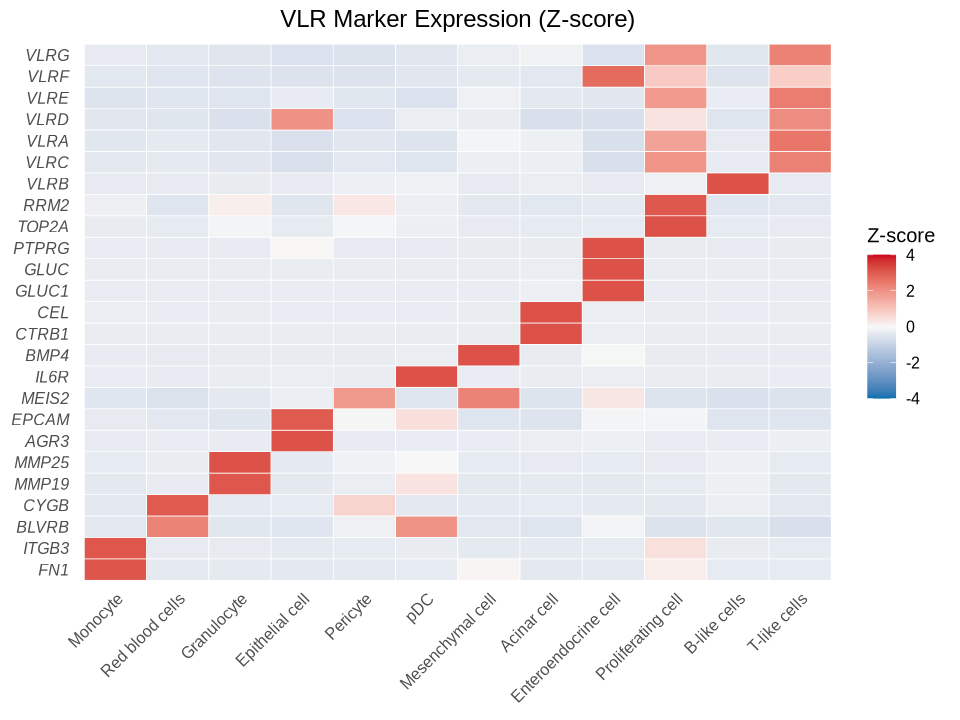

In [37]:
# 平均表达矩阵
exp_harmony <- AverageExpression(merge_sc.harmony1, return.seurat = FALSE)$RNA
# 选择感兴趣的基因
genes_harmony <- names(cluster_markers_harmony)
sub_exp_harmony <- exp_harmony[genes_harmony, , drop = FALSE]
# Z-score 标准化
scaled_exp_harmony <- t(scale(t(sub_exp_harmony)))
# 行名加注释
rownames(scaled_exp_harmony) <- cluster_markers_harmony[rownames(scaled_exp_harmony)]

# 转换为 long dataframe
scaled_df_harmony <- as.data.frame(scaled_exp_harmony)
scaled_df_harmony$Gene <- rownames(scaled_df_harmony)
df_long_harmony <- melt(scaled_df_harmony, id.vars = "Gene", variable.name = "Celltype", value.name = "Zscore")

# 设置 Celltype 和 Gene 的显示顺序
desired_order_harmony <- c(
  "Monocyte", "Red blood cells", "Granulocyte","Epithelial cell",
  "Pericyte", "pDC", "Mesenchymal cell", "Acinar cell", "Enteroendocrine cell",
    "Proliferating cell", "B-like cells", "T-like cells")
gene_order_harmony <- unname(cluster_markers_harmony)

df_long_harmony$Celltype <- factor(df_long_harmony$Celltype, levels = desired_order_harmony)
df_long_harmony$Gene <- factor(df_long_harmony$Gene, levels = gene_order_harmony)

# 设置颜色
my_colors_harmony <- scale_fill_gradient2(
  low = "#0571b0",  # 深蓝，对应 Z = -3
  mid = "#f7f7f7",  # 白色，对应 Z = 0
  high = "#ca0020", # 深红，对应 Z = +3
  midpoint = 0,
  limits = c(-4, 4), # 保持对称的视觉效果
  name = "Z-score"
)

# 作图
ggplot(df_long_harmony, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_harmony +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    plot.title = element_text(hjust = 0.5)
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

# 控制图像大小
options(repr.plot.width = 8, repr.plot.height = 6)

In [38]:
p_mergeheatmap <- ggplot(df_long_harmony, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_harmony +  # 假设这是 scale_fill_* 的语句
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    plot.title = element_text(hjust = 0.5)
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

ggsave("/home/yating/VLR/VLR_new/heatmap_VLR_marker_1.png", plot = p_mergeheatmap, width = 8, height = 6, dpi = 300)

# VLR特异基因热图

In [12]:
library(ComplexHeatmap)
library(RColorBrewer)
library(circlize)
library(viridis)
library(pheatmap)
library(dplyr)

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: ‘Co

In [64]:
sub_merge_sc.harmony <- subset(merge_sc.harmony1, 
                  subset = celltype_harmony %in% c("T-like cells", "B-like cells"))

In [65]:
VLR_TB_markers <- FindMarkers(
  sub_merge_sc.harmony,
  ident.1 = "T-like cells",
  ident.2 = "B-like cells",
  group.by = "celltype_harmony",
  min.pct = 0.25,
  logfc.threshold = 0.25
)

In [66]:
top_VLR_genes <- VLR_TB_markers %>%
  top_n(n = 35, wt = avg_log2FC) %>%
  rownames()

In [68]:
expr_mat <- GetAssayData(sub_merge_sc.harmony, assay = "RNA", slot = "data")  # log-normalized
expr_mat_use <- expr_mat[top_VLR_genes, ]

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [69]:
expr_scaled <- t(scale(t(as.matrix(expr_mat_use))))

In [70]:
annotation_col <- data.frame(
  CellType = sub_merge_sc.harmony$celltype_harmony,
  Tissue = sub_merge_sc.harmony$tissue  # 替换为你实际组织信息的meta列名
)
rownames(annotation_col) <- colnames(sub_merge_sc.harmony)

# 注释颜色
ann_colors <- list(
  CellType = c("T-like cells" = "#D73027", "B-like cells" = "#4575B4"),
  Tissue = c("intestine" = "#FC8D62", "gill" = "#66C2A5", "blood" = "#8DA0CB") # 示例配色，可改
)

In [71]:
# 手动排序细胞列
ordered_cells <- with(annotation_col, order(CellType, Tissue))
expr_scaled_ordered <- expr_scaled[, ordered_cells]
annotation_col_ordered <- annotation_col[ordered_cells, ]

In [136]:
# VLRB cell marker genes
vlrb_markers <- c(
  "MSTRG.4638","MSTRG.6505", "MSTRG.4356", "MSTRG.8810", "nbisL1-mrna-17203"
)

# VLRC cell marker genes
vlrc_markers <- c(
  "nbisL1-mrna-4804", "nbisL1-mrna-8677", "nbisL1-mrna-15664", 
  "MSTRG.4829", "MSTRG.31304", "MSTRG.31308", "MSTRG.5906", 
  "nbisL1-mrna-7316","nbisL1-mrna-15650"
)

# 合并为统一 marker gene 列表（用于热图）
marker_genes <- c(vlrb_markers, vlrc_markers)

In [73]:
top_deg_genes <- VLR_TB_markers %>%
  filter(avg_log2FC > 0.5, p_val_adj < 0.05) %>%
  filter(!rownames(.) %in% marker_genes) %>%
  top_n(n = 30, wt = avg_log2FC) %>%
  rownames()

In [74]:
remove_genes <- c(
  "MSTRG.4209", "MSTRG.23556", "MSTRG.23758", 
  "MSTRG.7322", "MSTRG.7320", "MSTRG.2966", "MSTRG.14367","nbisL1-mrna-8869"
)

top_deg_genes_filtered <- setdiff(top_deg_genes, remove_genes)

In [135]:
top_deg_genes_filtered

[1] "MSTRG.5131"        "MSTRG.15397"       "MSTRG.8958"       
 [4] "MSTRG.17308"       "nbisL1-mrna-4662"  "MSTRG.895"        
 [7] "MSTRG.3738"        "MSTRG.11253"       "nbisL1-mrna-10622"
[10] "nbisL1-mrna-791"   "nbisL1-mrna-389"   "MSTRG.20279"      
[13] "MSTRG.15672"       "nbisL1-mrna-4609"  "MSTRG.10212"      
[16] "MSTRG.18502"       "MSTRG.2303"        "MSTRG.7951"       
[19] "MSTRG.12950"       "nbisL1-mrna-5130"  "nbisL1-mrna-550"  
[22] "MSTRG.1397"

In [142]:
all_genes

[1] "MSTRG.4638"        "MSTRG.6505"        "MSTRG.4356"       
 [4] "MSTRG.8810"        "nbisL1-mrna-17203" "nbisL1-mrna-4804" 
 [7] "nbisL1-mrna-8677"  "nbisL1-mrna-15664" "MSTRG.4829"       
[10] "MSTRG.31304"       "MSTRG.31308"       "MSTRG.5906"       
[13] "nbisL1-mrna-7316"  "nbisL1-mrna-15650" "MSTRG.5131"       
[16] "MSTRG.15397"       "MSTRG.8958"        "MSTRG.17308"      
[19] "nbisL1-mrna-4662"  "MSTRG.895"         "MSTRG.3738"       
[22] "MSTRG.11253"       "nbisL1-mrna-10622" "nbisL1-mrna-791"  
[25] "nbisL1-mrna-389"   "MSTRG.20279"       "MSTRG.15672"      
[28] "nbisL1-mrna-4609"  "MSTRG.10212"       "MSTRG.18502"      
[31] "MSTRG.2303"        "MSTRG.7951"        "MSTRG.12950"      
[34] "nbisL1-mrna-5130"  "nbisL1-mrna-550"   "MSTRG.1397"

In [163]:
all_genes <- c(marker_genes, top_deg_genes_filtered)
expr_mat <- GetAssayData(sub_merge_sc.harmony, assay = "RNA", slot = "data")
genes_present <- intersect(all_genes, rownames(expr_mat))
expr_mat_use  <- expr_mat[genes_present, , drop = FALSE]
expr_mat_use <- expr_mat_use[, colSums(expr_mat_use) != 0, drop = FALSE]
expr_scaled <- t(scale(t(expr_mat_use), center = TRUE, scale = TRUE))
expr_scaled[is.na(expr_scaled)] <- 0

In [164]:
expr_scaled

,gill_CELL41_N1_1,gill_CELL115_N1_1,gill_CELL138_N1_1,gill_CELL140_N1_1,gill_CELL156_N2_1,gill_CELL159_N1_1,gill_CELL160_N2_1,gill_CELL268_N2_1,gill_CELL386_N1_1,gill_CELL425_N4_1,⋯,intestine_CELL10055_N1_6,intestine_CELL10058_N1_6,intestine_CELL10059_N1_6,intestine_CELL10061_N1_6,intestine_CELL10063_N1_6,intestine_CELL10064_N1_6,intestine_CELL10065_N1_6,intestine_CELL10066_N1_6,intestine_CELL10067_N1_6,intestine_CELL10069_N1_6
MSTRG.4638,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,⋯,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983,-0.17660983
MSTRG.6505,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,⋯,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040,-0.39643040
MSTRG.4356,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,2.15310111,-0.42278134,-0.42278134,⋯,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134,-0.42278134
MSTRG.8810,-0.70475709,-0.70475709,-0.70475709,-0.70475709,-0.70475709,-0.70475709,-0.70475709,1.85308414,1.66385786,-0.70475709,⋯,-0.70475709,-0.70475709,-0.70475709,-0.70475709,-0.70475709,-0.70475709,0.28454349,-0.70475709,-0.70475709,-0.70475709
nbisL1-mrna-17203,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,2.18921827,1.84899092,-0.54269923,⋯,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923,-0.54269923
nbisL1-mrna-4804,-0.80818069,-0.80818069,-0.80818069,-0.80818069,-0.80818069,-0.80818069,0.76138914,-0.80818069,0.47338038,-0.80818069,⋯,-0.80818069,-0.45191754,2.14068953,0.59675169,-0.80818069,0.71107133,0.34048118,1.12931034,-0.80818069,1.27447990
nbisL1-mrna-8677,0.40185029,-0.97646613,0.19852165,1.13052530,1.28964936,-0.97646613,1.29127293,-0.97646613,-0.97646613,-0.97646613,⋯,1.47682783,-0.11642250,1.69223991,1.57576560,1.28102869,1.32700733,-0.97646613,0.41891532,-0.97646613,1.24325103
nbisL1-mrna-15664,1.01973903,0.79121468,0.76569698,-0.70235157,2.02003775,2.29508871,1.67872405,-0.70235157,-0.70235157,-0.70235157,⋯,1.16390776,-0.28401745,-0.70235157,0.94735921,-0.70235157,1.08159652,-0.70235157,1.04106036,-0.70235157,-0.70235157
MSTRG.4829,-0.50207610,-0.50207610,-0.50207610,-0.50207610,0.96564129,-0.50207610,-0.50207610,-0.50207610,-0.50207610,-0.50207610,⋯,1.09572271,-0.01331509,-0.50207610,3.07469182,-0.50207610,-0.50207610,-0.50207610,-0.50207610,-0.50207610,2.35514700
MSTRG.31304,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,⋯,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770,-0.04610770


In [165]:
rownames(expr_scaled) <- all_genes  # 明确设定行名

In [166]:
# Clip extreme expression
expr_scaled[expr_scaled > 6] <- 6
expr_scaled[expr_scaled < -2] <- -2

In [153]:
setdiff(c(marker_genes, top_deg_genes_filtered), rownames(expr_scaled_ordered))

character(0)

In [154]:
setdiff(ordered_cells, colnames(expr_scaled))

character(0)

In [155]:
annotation_col <- data.frame(
  Tissue = sub_merge_sc.harmony$tissue,
  CellType = sub_merge_sc.harmony$celltype_harmony
)
rownames(annotation_col) <- colnames(sub_merge_sc.harmony)
# 先只保留 expr_scaled 中存在的细胞
annotation_col <- annotation_col[colnames(expr_scaled), , drop = FALSE]

# 再排序：先 CellType，再 Region
ordered_cells <- rownames(annotation_col)[order(annotation_col$CellType, annotation_col$Tissue)]

# 排序表达矩阵和注释
expr_scaled_ordered <- expr_scaled[, ordered_cells]
annotation_col_ordered <- annotation_col[ordered_cells, , drop = FALSE]

In [124]:
setdiff(c(marker_genes, top_deg_genes_filtered), rownames(expr_scaled_ordered))

character(0)

In [168]:
#all_genes <- unique(c(marker_genes, top_deg_genes))
gene_group <- ifelse(all_genes %in% marker_genes, "Marker", "DEG")
annotation_row <- data.frame(Group = gene_group)
rownames(annotation_row) <- all_genes

ann_colors <- list(
  CellType = c("T-like cells" = "#D73027", "B-like cells" = "#4575B4"),
  Tissue = c("gill" = "#66C2A5", "blood" = "#8DA0CB", "intestine" = "#FC8D62"),
  Group = c("Marker" = "#E41A1C", "DEG" = "#377EB8")
)

ComplexHeatmap

In [169]:
# 强制指定分组顺序：Marker 在上
annotation_row$Group <- factor(annotation_row$Group, levels = c("Marker", "DEG"))

In [172]:
library(ComplexHeatmap)
annotation_col_ordered <- annotation_col[colnames(expr_scaled_ordered), , drop = FALSE]
h <- Heatmap(
  matrix = expr_scaled_ordered,
  show_column_names = FALSE,
  show_row_names = TRUE,
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  top_annotation = HeatmapAnnotation(
    CellType = annotation_col_ordered$CellType,
    Tissue = annotation_col_ordered$Tissue,
    col = ann_colors
  ),
  row_split = annotation_row$Group,  
  col = viridis::viridis(100, option = "D")
)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



# blood

In [40]:
blood_sc@meta.data$newcell <- as.character(blood_sc@meta.data$newcell)
blood_sc@meta.data$newcell[blood_sc@meta.data$newcell == "VLRC cell"] <- "T-like cells"
blood_sc@meta.data$newcell[blood_sc@meta.data$newcell == "VLRB cell"] <- "B-like cells"
#gill_sc@meta.data$newcell[gill_sc@meta.data$newcell == "Endothelial cell"] <- "Epithelial cell"

In [41]:
unique(blood_sc@meta.data$newcell)

[1] "Cycling cell"       "Granulocyte"        "Proliferating cell"
 [4] "pDC"                "Neutrophils"        "B-like cells"      
 [7] "dendritic cell"     "T-like cells"       "Red blood cells"   
[10] "Monocyte"           "Myeloid cell"

In [42]:
blood_colors <- c(
  "Cycling cell" = "#E64B35",  # 红橙
  "dendritic cell" = "#D39BCB",                  # 浅紫
  "pDC" = "#F38160",                 
  "Neutrophils" = "#00A087",                    # 青绿色
  "Granulocyte" = "#4DBBD5",                    # 蓝色
  "Monocyte" = "#3C5488",                    # 深蓝灰
  "Myeloid cell" = "#7E6148",                       # 咖啡色
  "Proliferating cell" = "#A6A6A6",             # 肤色
  "Red blood cells" = "#FAA39E",                # 鲜红
  "T-like cells" = "#B24745",              # 深砖红
  "B-like cells" = "#3E7CB1"                       # 浅蓝紫
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



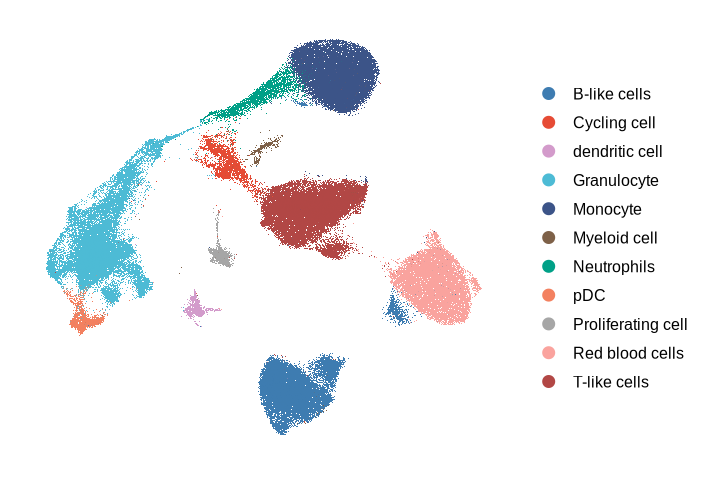

In [27]:
DimPlot(blood_sc, group.by = "newcell") +
  scale_color_manual(values = blood_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )
options(repr.plot.width = 6, repr.plot.height = 4)

In [87]:
# 创建 blood 图像对象
p1_blood <- DimPlot(blood_sc, group.by = "newcell") +
  scale_color_manual(values = blood_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )

# 保存图像
ggsave(
  filename = "/home/yating/VLR/blood_umap_nocircle.png",
  plot = p1_blood,
  width = 6,
  height = 4,
  dpi = 300
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



blood_gene

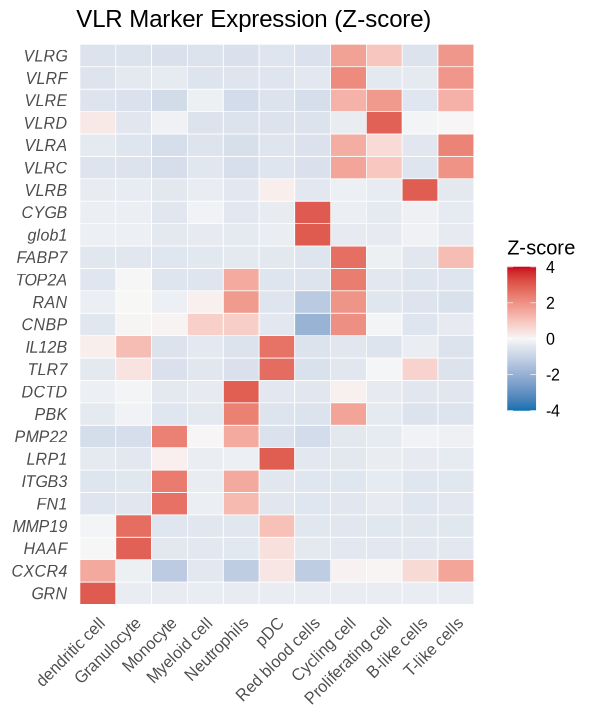

In [44]:
# 设置身份为 newcell1_blood
Idents(blood_sc) <- "newcell"

# 计算表达矩阵
blood_exp <- AverageExpression(blood_sc, return.seurat = FALSE)$RNA

# 选择感兴趣的基因
genes_blood <- names(cluster_markers_blood)
blood_sub_exp <- blood_exp[genes_blood, , drop = FALSE]

# Z-score标准化
blood_scaled_exp <- t(scale(t(blood_sub_exp)))

# 重命名行为 marker 基因名
rownames(blood_scaled_exp) <- cluster_markers_blood[rownames(blood_scaled_exp)]

# 将 matrix 转换成 long dataframe
blood_scaled_df <- as.data.frame(blood_scaled_exp)
blood_scaled_df$Gene <- rownames(blood_scaled_df)
df_long_blood <- melt(blood_scaled_df, id.vars = "Gene", variable.name = "Celltype", value.name = "Zscore")

# 自定义 celltype 顺序（VLRC和VLRB 放最后）
desired_order_blood <- c(
   "dendritic cell", "Granulocyte", "Monocyte", 
  "Myeloid cell", "Neutrophils", "pDC", "Red blood cells","Cycling cell", "Proliferating cell",
  "B-like cells", "T-like cells"
)
gene_order_blood <- unname(cluster_markers_blood)

# 设置 Celltype 和 Gene 为因子，保持顺序
df_long_blood$Celltype <- factor(df_long_blood$Celltype, levels = desired_order_blood)
df_long_blood$Gene <- factor(df_long_blood$Gene, levels = gene_order_blood)

# 设置颜色映射（与原图一致）
my_colors_blood <- scale_fill_gradient2(
  low = "#0571b0",     # 深蓝
  mid = "#f7f7f7",     # 中性
  high = "#ca0020",    # 深红
  midpoint = 0,
  limits = c(-4, 4),
  name = "Z-score"
)

# 绘图
ggplot(df_long_blood, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_blood +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    axis.title = element_blank()
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

# 控制图大小
options(repr.plot.width = 5, repr.plot.height = 6)

In [45]:
p_blood_heatmap <- ggplot(df_long_blood, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_blood +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    axis.title = element_blank()
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

ggsave("/home/yating/VLR/VLR_new/blood_marker_heatmap_TB.png",
       plot = p_blood_heatmap,
       width = 5, height = 6, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



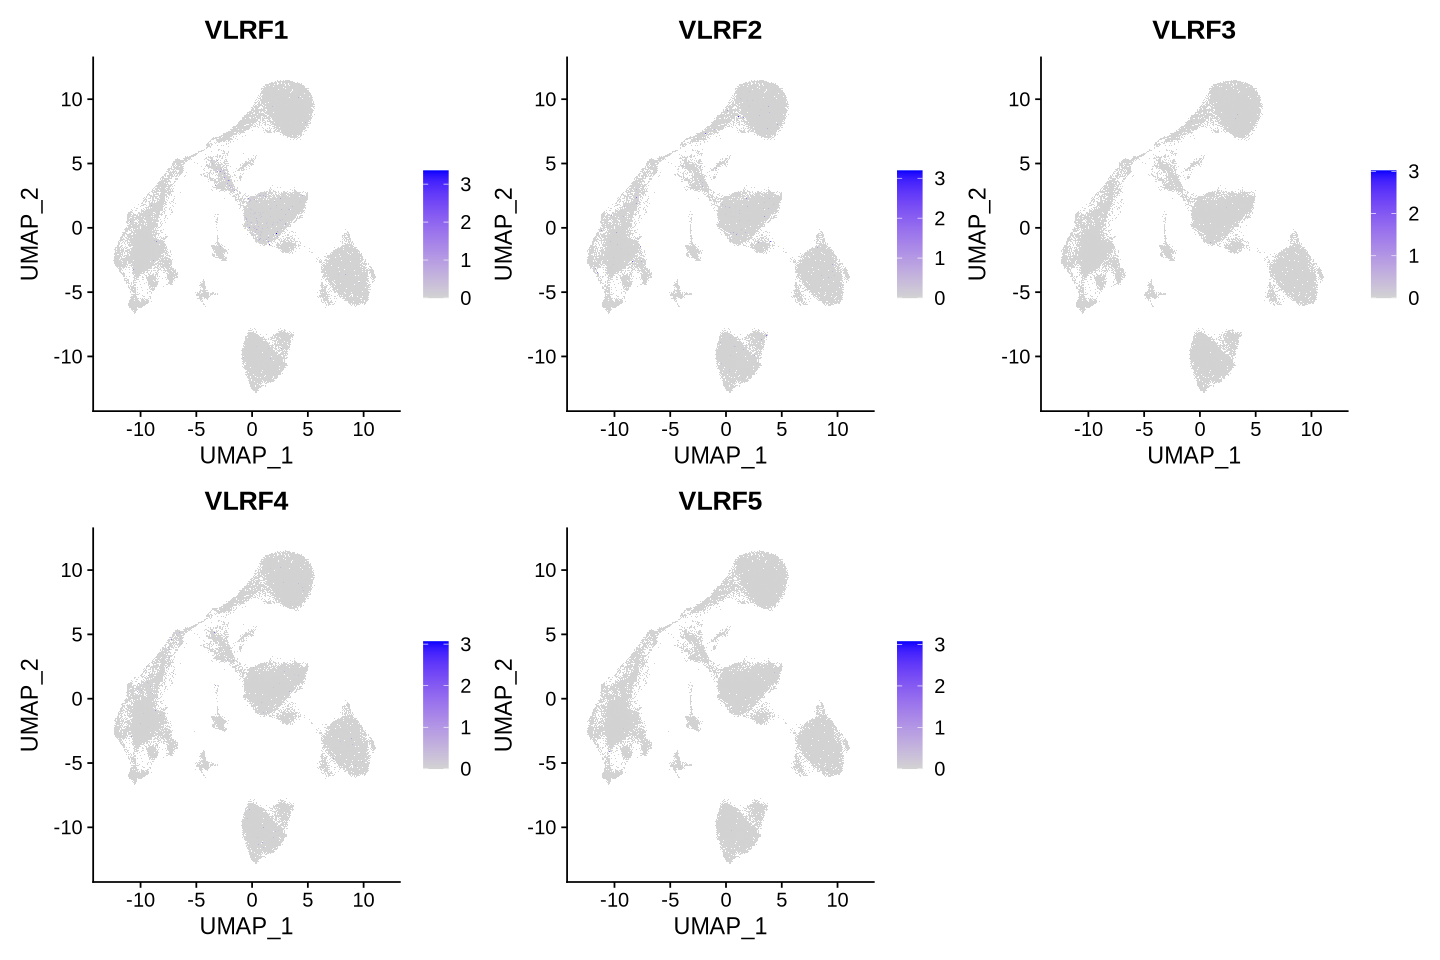

In [185]:
plots <- lapply(names(potenial_VLRF_markers ), function(gene) {
  FeaturePlot(blood_sc, features = gene) +
    ggtitle(potenial_VLRF_markers [gene]) +
    theme(plot.title = element_text(hjust = 0.5))
})

wrap_plots(plots, ncol = 3)
options(repr.plot.width = 12, repr.plot.height = 8)

In [66]:
p_blood_vlra <- FeaturePlot(blood_sc, features = c("nbisL1-mrna-15664")) +
  labs(title = "VLRA") +
  theme_void() +  # 移除所有坐标轴元素
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),   # 加粗标题
    legend.position = "right"                                # 保留图例
  )

ggsave("/home/yating/VLR/blood_VLRA_featureplot.png",
       plot = p_blood_vlra,
       width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [67]:
p_blood_vlrc <- FeaturePlot(blood_sc, features = c("nbisL1-mrna-8677")) +
  labs(title = "VLRC") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/blood_VLRC_featureplot.png", plot = p_blood_vlrc, width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [68]:
p_blood_vlrb <- FeaturePlot(blood_sc, features = c("MSTRG.4638")) +
  labs(title = "VLRB") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/blood_VLRB_featureplot.png", plot = p_blood_vlrb, width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [178]:
p_blood_vlrf <- FeaturePlot(blood_sc, features = c("nbisL1-mrna-15650")) +
  labs(title = "VLRF") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/blood_VLRF_featureplot.png", plot = p_blood_vlrf, width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [179]:
p_blood_vlrg <- FeaturePlot(blood_sc, features = c("MSTRG.4829")) +
  labs(title = "VLRG") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/blood_VLRG_featureplot.png", plot = p_blood_vlrg, width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [70]:
p_blood_vlrd <- FeaturePlot(blood_sc, features = c("MSTRG.31304")) +
  labs(title = "VLRD") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/blood_VLRD_featureplot.png", plot = p_blood_vlrd, width = 4, height = 3.5, dpi = 300)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [71]:
p_blood_vlre <- FeaturePlot(blood_sc, features = c("MSTRG.31308")) +
  labs(title = "VLRE") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/blood_VLRE_featureplot.png", plot = p_blood_vlre, width = 4, height = 3.5, dpi = 300)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



# Intestine

In [13]:
intestine_sc@meta.data$newcell <- as.character(intestine_sc@meta.data$newcell)
intestine_sc@meta.data$newcell[intestine_sc@meta.data$newcell == "VLRC cell"] <- "T-like cells"
intestine_sc@meta.data$newcell[intestine_sc@meta.data$newcell == "VLRB cell"] <- "B-like cells"
#gill_sc@meta.data$newcell[gill_sc@meta.data$newcell == "Endothelial cell"] <- "Epithelial cell"

In [14]:
unique(intestine_sc@meta.data$newcell)

[1] "Granulocyte"                      "Red blood cells"                 
 [3] "B-like cells"                     "ENS glia"                        
 [5] "Epithelial cell"                  "T-like cells"                    
 [7] "Pericyte"                         "Mesenchyme"                      
 [9] "Paneth cell"                      "Mesothelial cell"                
[11] "Plasmacytoid dendritic cell(pDC)" "Adipocyte"                       
[13] "Neutrophils"                      "Islet Cell"                      
[15] "Monocyte"                         "Fibroblasts"                     
[17] "Ciliated epithelial cells"        "Acinar cell"                     
[19] "Enteroendocrine cell"

In [16]:
intestine_colors <- c(
  "Granulocyte"                       = "#4DBBD5",   # 浅蓝青（保留）
  "Red blood cells"                   = "#FAA39E",   # 鲜红（保留）
  "B-like cells"                      = "#3E7CB1",   # 深蓝紫（保留）
  "ENS glia"                          = "#BC80BD",   # 淡紫丁香
  "Epithelial cell"                   = "#FDB462",   # 橙黄色
  "T-like cells"                      = "#B24745",   # 深砖红（保留）
  "Pericyte"                          = "#8DD3C7",   # 浅青绿
  "Mesenchyme"                        = "#B3DE69",   # 青绿色偏黄
  "Paneth cell"                       = "#FFED6F",   # 柠檬黄
  "Mesothelial cell"                  = "#FB8072",   # 西瓜红
  "Plasmacytoid dendritic cell(pDC)"  = "#A6CEE3",   # 浅蓝
  "Adipocyte"                         = "#FDBF6F",   # 橘黄
  "Neutrophils"                       = "#00A087",   # 青绿色（保留）
  "Islet Cell"                        = "#CAB2D6",   # 淡紫灰
  "Monocyte"                          = "#3C5488",   # 深蓝灰（保留）
  "Fibroblasts"                       = "#999999",   # 中性灰
  "Ciliated epithelial cells"         = "#B2DF8A",   # 浅绿
  "Acinar cell"                       = "#FF7F00",   # 橙色
  "Enteroendocrine cell"              = "#6A3D9A"    # 深紫
)

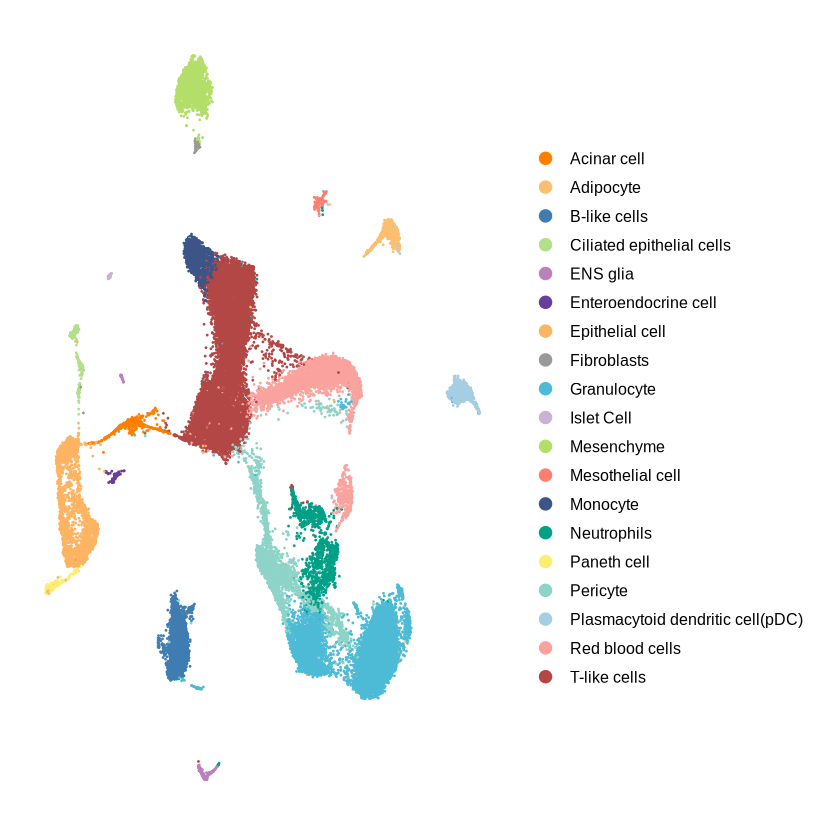

In [18]:
DimPlot(intestine_sc, group.by = "newcell") +
  scale_color_manual(values = intestine_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )
options(repr.plot.width = 6, repr.plot.height = 4)

In [88]:
# 创建 intestine 图像对象
p1_intestine <- DimPlot(intestine_sc, group.by = "newcell") +
  scale_color_manual(values = intestine_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )

# 保存图像
ggsave(
  filename = "/home/yating/VLR/intestine_umap_nocircle.png",
  plot = p1_intestine,
  width = 6,
  height = 4,
  dpi = 300
)

In [20]:
# 创建 intestine 图像对象
p1_intestine <- DimPlot(intestine_sc, group.by = "newcell") +
  scale_color_manual(values = intestine_colors) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid = element_blank(),        # 去除网格线
    axis.title.x = element_blank(),      # 去除 X 轴标题
    axis.title.y = element_blank(),      # 去除 Y 轴标题
    axis.text = element_blank(),         # 去除坐标轴数字 ✅
    axis.ticks = element_blank(),        # 去除刻度线 ✅
    legend.position = "right",           
    legend.title = element_blank(),
    plot.title = element_blank()
  )

# 保存图像
ggsave(
  filename = "/home/yating/VLR/VLR_new/intestine_umap_nocircle.png",
  plot = p1_intestine,
  width = 6,
  height = 4.5,
  dpi = 300
)

In [36]:
umap_df_intestine <- as.data.frame(intestine_sc@reductions$umap@cell.embeddings)
umap_df_intestine$group <- intestine_sc$newcell

In [38]:
p_intestine <- ggplot(umap_df_intestine, aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = group), size = 0.5, alpha = 0.6) +
  geom_mark_hull(
    data = df_core_all_intestine,
    aes(group = group),
    color = "black",
    fill = NA,
    linetype = "solid",
    linewidth = 0.8,
    concavity = 2, expand = unit(2, "mm")
  ) +
  geom_text_repel(
    data = label_positions_intestine,
    aes(label = group),
    size = 5, fontface = "bold", color = "black",
    nudge_x = label_positions_intestine$nudge_x,
    nudge_y = label_positions_intestine$nudge_y,
    box.padding = 0.8, max.overlaps = Inf
  ) +
  scale_color_manual(values = intestine_colors) +
  guides(color = guide_legend(override.aes = list(size = 3))) +
  theme_void(base_size = 12) +
  theme(
    legend.position = "right",
    legend.title = element_blank()
  )

ggsave("/home/yating/VLR/intestine_umap_clustered_TB.png", plot = p_intestine, width = 6, height = 4, dpi = 300)

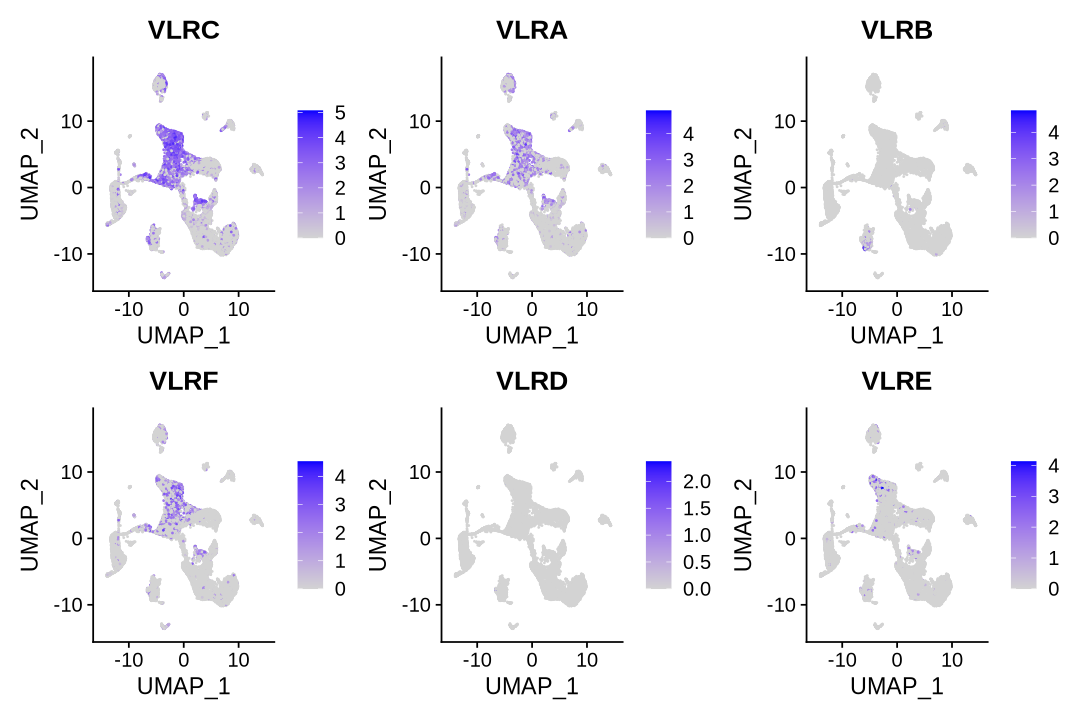

In [235]:
plots <- lapply(names(VLR_markers), function(gene) {
  FeaturePlot(intestine_sc, features = gene) +
    ggtitle(VLR_markers[gene]) +
    theme(plot.title = element_text(hjust = 0.5))
})

wrap_plots(plots, ncol = 3)
options(repr.plot.width = 9, repr.plot.height = 6)

In [73]:
# VLRA
p_intestine_vlra <- FeaturePlot(intestine_sc, features = c("nbisL1-mrna-15664")) +
  labs(title = "VLRA") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/intestine_VLRA_featureplot.png", plot = p_intestine_vlra, width = 4, height = 3.5, dpi = 300)

# VLRC
p_intestine_vlrc <- FeaturePlot(intestine_sc, features = c("nbisL1-mrna-8677")) +
  labs(title = "VLRC") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/intestine_VLRC_featureplot.png", plot = p_intestine_vlrc, width = 4, height = 3.5, dpi = 300)

# VLRB
p_intestine_vlrb <- FeaturePlot(intestine_sc, features = c("MSTRG.4638")) +
  labs(title = "VLRB") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/intestine_VLRB_featureplot.png", plot = p_intestine_vlrb, width = 4, height = 3.5, dpi = 300)

# VLRD
p_intestine_vlrd <- FeaturePlot(intestine_sc, features = c("MSTRG.31304")) +
  labs(title = "VLRD") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/intestine_VLRD_featureplot.png", plot = p_intestine_vlrd, width = 4, height = 3.5, dpi = 300)

# VLRE
p_intestine_vlre <- FeaturePlot(intestine_sc, features = c("MSTRG.31308")) +
  labs(title = "VLRE") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/intestine_VLRE_featureplot.png", plot = p_intestine_vlre, width = 4, height = 3.5, dpi = 300)

In [57]:
# VLRF
p_intestine_vlrf <- FeaturePlot(intestine_sc, features = c("nbisL1-mrna-15650")) +
  labs(title = "VLRF") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/intestine_VLRF_featureplot.png", plot = p_intestine_vlrf, width = 4, height = 3.5, dpi = 300)

# VLRG
p_intestine_vlrg <- FeaturePlot(intestine_sc, features = c("MSTRG.4829")) +
  labs(title = "VLRG") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
ggsave("/home/yating/VLR/VLR_new/intestine_VLRG_featureplot.png", plot = p_intestine_vlrg, width = 4, height = 3.5, dpi = 300)

intestine

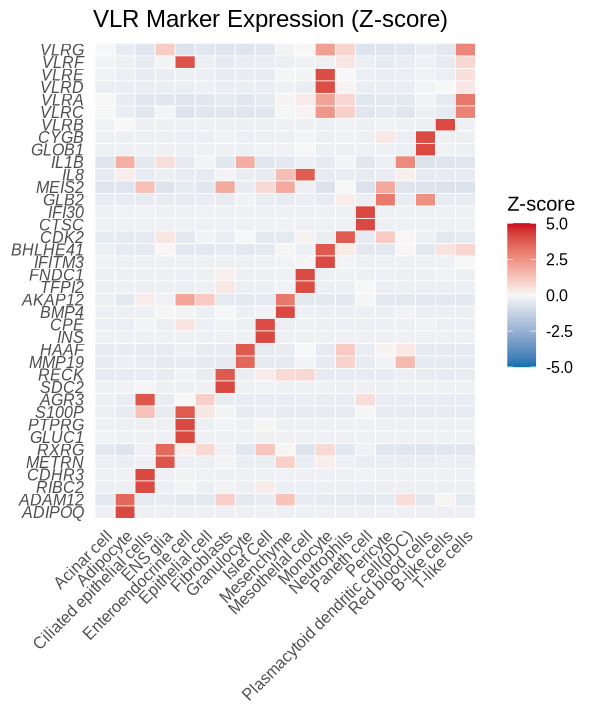

In [59]:
# 设置身份为 newcell1_intestine
Idents(intestine_sc) <- "newcell"

# 计算表达矩阵
intestine_exp <- AverageExpression(intestine_sc, return.seurat = FALSE)$RNA

# 选择感兴趣的基因
genes_intestine <- names(cluster_markers_intestine)
intestine_sub_exp <- intestine_exp[genes_intestine, , drop = FALSE]

# Z-score 标准化
intestine_scaled_exp <- t(scale(t(intestine_sub_exp)))

# 重命名行为 marker 基因名
rownames(intestine_scaled_exp) <- cluster_markers_intestine[rownames(intestine_scaled_exp)]

# 将 matrix 转换为 long dataframe
intestine_scaled_df <- as.data.frame(intestine_scaled_exp)
intestine_scaled_df$Gene <- rownames(intestine_scaled_df)
df_long_intestine <- melt(intestine_scaled_df, id.vars = "Gene", variable.name = "Celltype", value.name = "Zscore")

# 设置细胞类型顺序，按图例顺序
desired_order_intestine <- c(
  "Acinar cell","Adipocyte", "Ciliated epithelial cells", "ENS glia", "Enteroendocrine cell",
  "Epithelial cell", "Fibroblasts", "Granulocyte", "Islet Cell",
  "Mesenchyme", "Mesothelial cell", "Monocyte", "Neutrophils",
  "Paneth cell", "Pericyte", "Plasmacytoid dendritic cell(pDC)",
  "Red blood cells", "B-like cells","T-like cells"
)
gene_order_intestine <- unname(cluster_markers_intestine)

# 设置 Celltype 和 Gene 为因子，保持顺序
df_long_intestine$Celltype <- factor(df_long_intestine$Celltype, levels = desired_order_intestine)
df_long_intestine$Gene <- factor(df_long_intestine$Gene, levels = gene_order_intestine)

# 设置颜色映射
my_colors_intestine <- scale_fill_gradient2(
  low = "#0571b0",     # 深蓝
  mid = "#f7f7f7",     # 中性
  high = "#ca0020",    # 深红
  midpoint = 0,
  limits = c(-5, 5),
  name = "Z-score"
)

# 绘图
ggplot(df_long_intestine, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_intestine +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    axis.title = element_blank()
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)

# 控制图大小
options(repr.plot.width = 5, repr.plot.height = 6)

In [60]:
p_intestine_heatmap <- ggplot(df_long_intestine, aes(x = Celltype, y = Gene, fill = Zscore)) +
  geom_tile(color = "white", linewidth = 0.2) +
  my_colors_intestine +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y = element_text(face = "italic"),
    panel.grid = element_blank(),
    axis.title = element_blank()
  ) +
  labs(title = "VLR Marker Expression (Z-score)", x = NULL, y = NULL)
ggsave("/home/yating/VLR/VLR_new/intestine_marker_heatmap_TB.png",
       plot = p_intestine_heatmap,
       width = 5, height = 8, units = "in", dpi = 300)

In [19]:
head(gill_sc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,celltype,subtype,tissue,batch,RNA_snn_res.0.5,newcell
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>
CELL2_N1_1,Gill-1,3560,431,0,Ionocyte,Ionocyte-4,gill,Gill-1,4,Ionocyte
CELL3_N1_1,Gill-1,1396,239,0,Erythroblasts,Erythroblasts-0,gill,Gill-1,0,Red blood cells
CELL4_N1_1,Gill-1,1273,575,0,Langerhans Cells,Langerhans Cells-13,gill,Gill-1,13,dendritic cell
CELL7_N1_1,Gill-1,2304,281,0,Erythroblasts,Erythroblasts-0,gill,Gill-1,0,Red blood cells
CELL8_N1_1,Gill-1,1969,261,0,Erythroblasts,Erythroblasts-0,gill,Gill-1,0,Red blood cells
CELL10_N1_1,Gill-1,1860,205,0,Erythroblasts,Erythroblasts-0,gill,Gill-1,0,Red blood cells


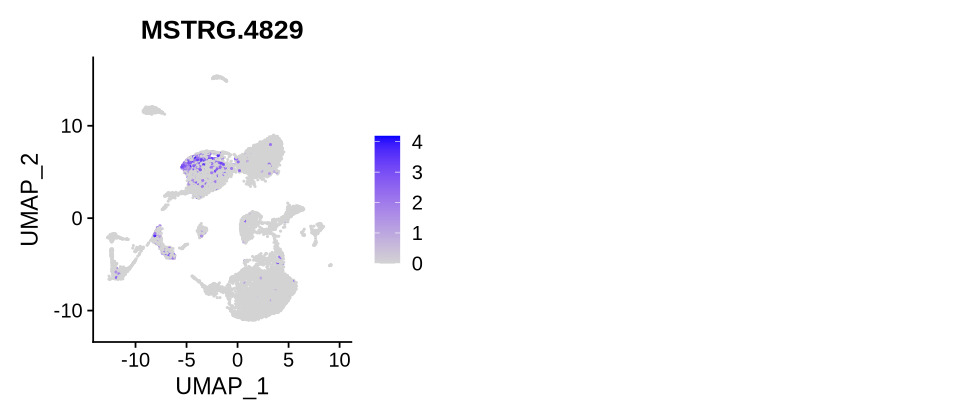

In [79]:
#VLRF
FeaturePlot(gill_sc, features = c("MSTRG.4829"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)

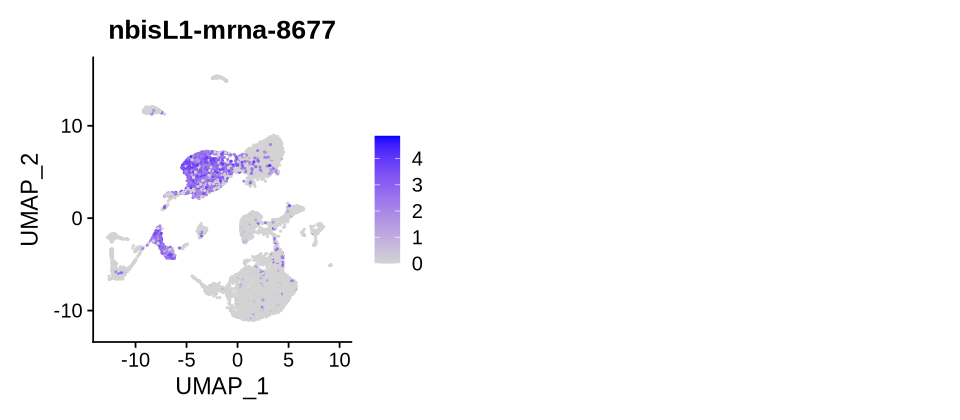

In [81]:
#VLRC
FeaturePlot(gill_sc, features = c("nbisL1-mrna-8677"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)

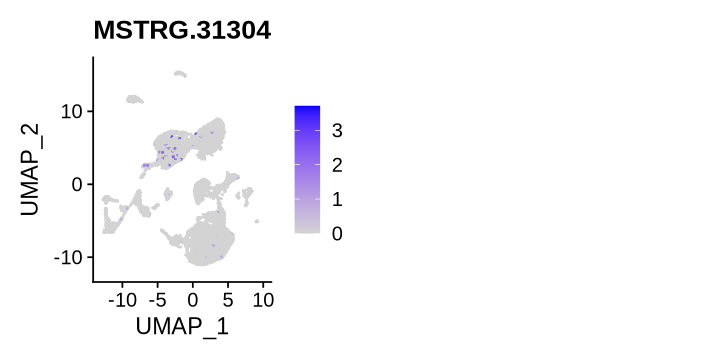

In [42]:
#VLRDE
FeaturePlot(gill_sc, features = c("MSTRG.31304"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



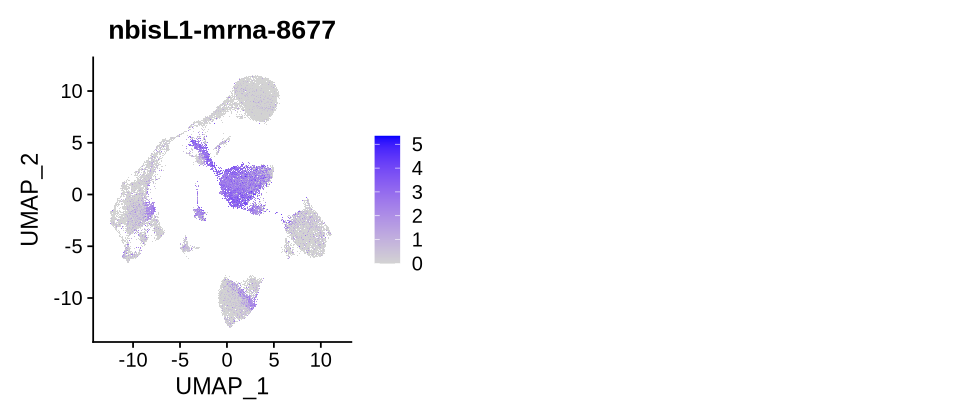

In [134]:
#VLRC
FeaturePlot(blood_sc, features = c("nbisL1-mrna-8677"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



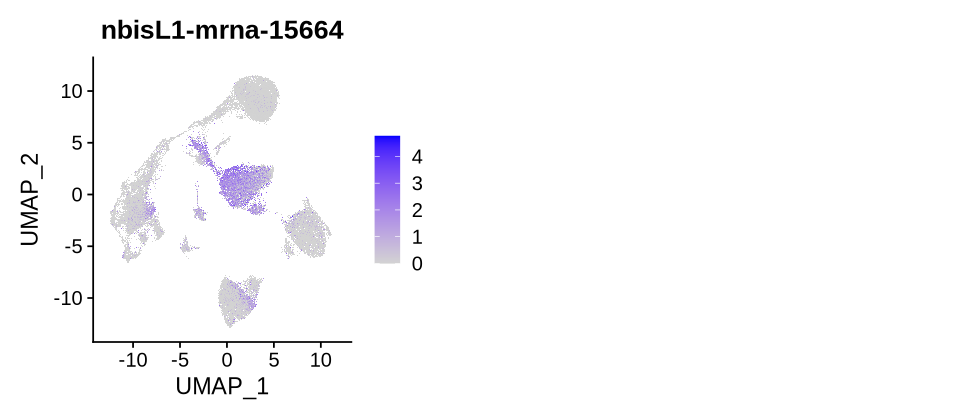

In [136]:
#VLRA
FeaturePlot(blood_sc, features = c("nbisL1-mrna-15664"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



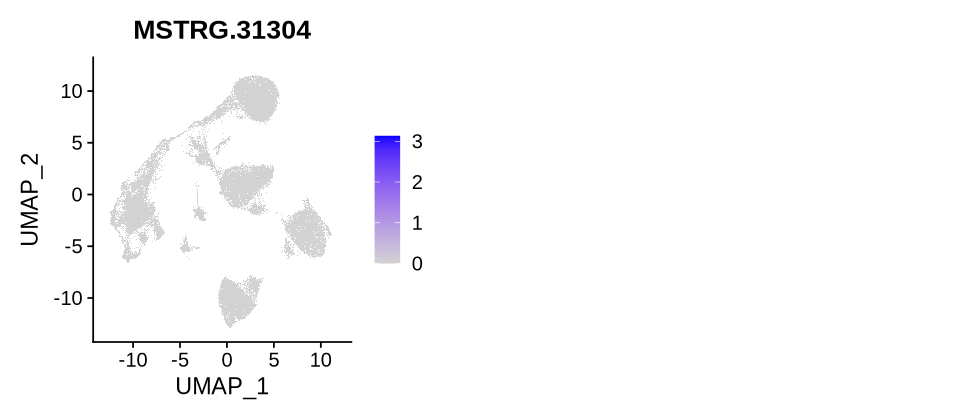

In [72]:
#VLRDE
FeaturePlot(blood_sc, features = c("MSTRG.31304"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



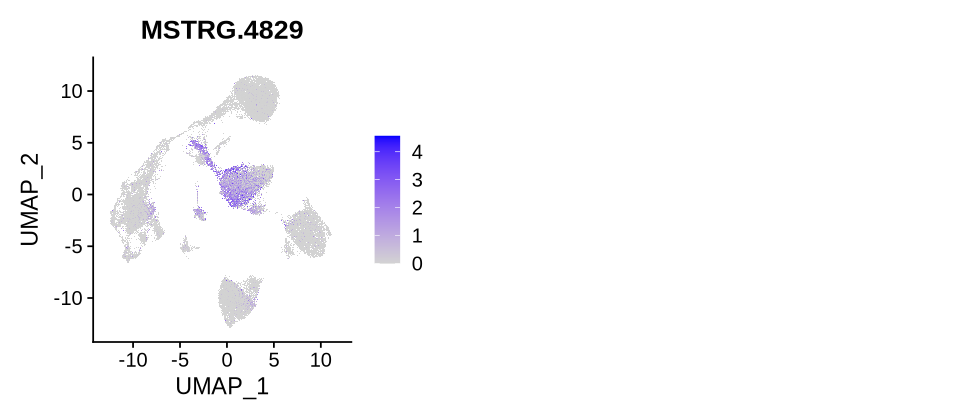

In [92]:
#VLRF
FeaturePlot(blood_sc, features = c("MSTRG.4829"), ncol = 3)
options(repr.plot.width = 8, repr.plot.height = 3.5)